# Using whisper to transcribe audio

In [8]:
!pip install git+https://github.com/openai/whisper.git
# !sudo apt update && sudo apt install ffmpeg   #run in terminal

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-iwlwm20j
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-iwlwm20j
  Resolved https://github.com/openai/whisper.git to commit c0d2f624c09dc18e709e37c2ad90c039a4eb72a2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 MB 6.1 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=18400129d782f350c285ae4992a28b2ae94ecd615536d1b0807118e9d9ecff43
  Stored in directory: /tmp/pip-ephem-wheel-cache-0x1hzk7f/wheels/c3/03/25/5e0ba78bc27a3a089f137c9f1d92fdfce16d06996c071a016c
Successfully built openai-whisper


In [ ]:
!whisper -h

usage: whisper [-h] [--model MODEL] [--model_dir MODEL_DIR] [--device DEVICE]
               [--output_dir OUTPUT_DIR]
               [--output_format {txt,vtt,srt,tsv,json,all}]
               [--verbose VERBOSE] [--task {transcribe,translate}]
               [--language {af,am,ar,as,az,ba,be,bg,bn,bo,br,bs,ca,cs,cy,da,de,el,en,es,et,eu,fa,fi,fo,fr,gl,gu,ha,haw,he,hi,hr,ht,hu,hy,id,is,it,ja,jw,ka,kk,km,kn,ko,la,lb,ln,lo,lt,lv,mg,mi,mk,ml,mn,mr,ms,mt,my,ne,nl,nn,no,oc,pa,pl,ps,pt,ro,ru,sa,sd,si,sk,sl,sn,so,sq,sr,su,sv,sw,ta,te,tg,th,tk,tl,tr,tt,uk,ur,uz,vi,yi,yo,yue,zh,Afrikaans,Albanian,Amharic,Arabic,Armenian,Assamese,Azerbaijani,Bashkir,Basque,Belarusian,Bengali,Bosnian,Breton,Bulgarian,Burmese,Cantonese,Castilian,Catalan,Chinese,Croatian,Czech,Danish,Dutch,English,Estonian,Faroese,Finnish,Flemish,French,Galician,Georgian,German,Greek,Gujarati,Haitian,Haitian Creole,Hausa,Hawaiian,Hebrew,Hindi,Hungarian,Icelandic,Indonesian,Italian,Japanese,Javanese,Kannada,Kazakh,Khmer,Korean,Lao,L

In [ ]:
!whisper "/content/testaudio1.wav" --model medium.en

100%|█████████████████████████████████████| 1.42G/1.42G [00:42<00:00, 35.7MiB/s]
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
[00:00.000 --> 00:05.560]  Hello, this is a test, I want to see if this works.


#Test recording audio


In [9]:
from google.colab import output
output.enable_custom_widget_manager()

In [10]:
!pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display, Audio
from google.colab import output
import numpy as np
import io
import base64

# Create start and stop buttons
start_button = widgets.Button(description="Start Recording")
stop_button = widgets.Button(description="Stop Recording")

recording = False

# Function to start recording
def start_recording(b):
    global recording
    recording = True
    output.eval_js('startRecording()')
    print("Recording started...")

# Function to stop recording and save the file
def stop_recording(b):
    global recording
    if not recording:
        print("No recording in progress.")
        return

    recording = False
    audio_data = output.eval_js('stopRecording()')

    if audio_data is None:
        print("No audio data recorded.")
        return

    # Decode base64 data
    audio_bytes = base64.b64decode(audio_data['audio'])

    # Create and display Audio widget
    audio_obj = Audio(data=audio_bytes, rate=audio_data['sampleRate'])
    display(audio_obj)

    # Save as WAV file
    with open("recorded_audio.wav", "wb") as f:
        f.write(audio_bytes)

    print("Audio saved as 'recorded_audio.wav'")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.6 MB/s eta 0:00:00


In [11]:
#record invoice
# Connect buttons to functions
start_button.on_click(start_recording)
stop_button.on_click(stop_recording)

# Display buttons
display(start_button, stop_button)

# JavaScript to handle audio recording
output.eval_js('''
    let recorder, stream;

    async function startRecording() {
        stream = await navigator.mediaDevices.getUserMedia({ audio: true });
        recorder = new MediaRecorder(stream);
        chunks = [];
        recorder.ondataavailable = e => chunks.push(e.data);
        recorder.start();
    }

    function stopRecording() {
        return new Promise(resolve => {
            recorder.onstop = () => {
                const blob = new Blob(chunks, { type: 'audio/wav' });
                chunks = [];
                stream.getTracks().forEach(track => track.stop());
                const reader = new FileReader();
                reader.onload = () => {
                    const base64data = reader.result.split(',')[1];
                    resolve({audio: base64data, sampleRate: 44100});
                };
                reader.readAsDataURL(blob);
            };
            recorder.stop();
        });
    }
''')

Button(description='Start Recording', style=ButtonStyle())

Button(description='Stop Recording', style=ButtonStyle())

#Test first agent router

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph langgraph-prebuilt

In [12]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


Here, we'll use [LangSmith](https://docs.langchain.com/langsmith/home) for [tracing](https://docs.langchain.com/langsmith/observability-concepts).

We'll log to a project, `langchain-academy`.

In [ ]:
_set_env("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "Dreamjournal-Agent"

LANGSMITH_API_KEY: ··········


In [ ]:
from langchain_openai import ChatOpenAI
import whisper
import time
from IPython.display import display


def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b


def transcribe(audio_path: str) -> str:
    """Transcribe an audio file using Whisper Python API.

    Args:
        audio_path: Path to the audio file.

    Returns:
        The transcription as a string.
    """
    # Load the model
    model = whisper.load_model("medium.en")

    # Transcribe the audio
    result = model.transcribe(audio_path)

    # Return the text only
    return result["text"]


def record_audio() -> str:
    """
    Displays the audio recording UI for the user.
    The user must record audio manually.
    """

    #record invoice
    # Connect buttons to functions
    start_button.on_click(start_recording)
    stop_button.on_click(stop_recording)

    # Display buttons
    display(start_button, stop_button)

    # JavaScript to handle audio recording
    output.eval_js('''
        let recorder, stream;

        async function startRecording() {
            stream = await navigator.mediaDevices.getUserMedia({ audio: true });
            recorder = new MediaRecorder(stream);
            chunks = [];
            recorder.ondataavailable = e => chunks.push(e.data);
            recorder.start();
        }

        function stopRecording() {
            return new Promise(resolve => {
                recorder.onstop = () => {
                    const blob = new Blob(chunks, { type: 'audio/wav' });
                    chunks = [];
                    stream.getTracks().forEach(track => track.stop());
                    const reader = new FileReader();
                    reader.onload = () => {
                        const base64data = reader.result.split(',')[1];
                        resolve({audio: base64data, sampleRate: 44100});
                    };
                    reader.readAsDataURL(blob);
                };
                recorder.stop();
            });
        }
    ''')

    return (
        "Audio recording UI displayed. "
        "Please click Start Recording, then Stop Recording. "
        "The file will be saved as recorded_audio.wav."
    )

tools = [add, multiply, divide,transcribe, record_audio]
llm = ChatOpenAI(model="gpt-4o")


llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

In [ ]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with making calculations or using a tool to transcribe audio or use a tool that the user can use to record audio, when the user uses record audio you can finish the session")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

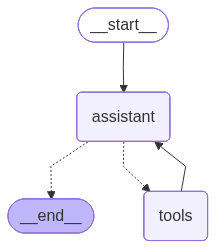

In [ ]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
messages = [HumanMessage(content="Add 3 and 8. Multiply the output by 10. Divide the output by 2")]
messages = react_graph.invoke({"messages": messages})

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 8. Multiply the output by 10. Divide the output by 2
================================== Ai Message ==================================
Tool Calls:
  add (call_WoQdU9CRyu5oNnQ9OMBYfsxZ)
 Call ID: call_WoQdU9CRyu5oNnQ9OMBYfsxZ
  Args:
    a: 3
    b: 8
================================= Tool Message =================================
Name: add

11
================================== Ai Message ==================================
Tool Calls:
  multiply (call_qEpOxcwzNLqGPnDS11tWrmvK)
 Call ID: call_qEpOxcwzNLqGPnDS11tWrmvK
  Args:
    a: 11
    b: 10
================================= Tool Message =================================
Name: multiply

110
================================== Ai Message ==================================
Tool Calls:
  divide (call_AzSY5u5xouT1CCru9TEAjqKB)
 Call ID: call_AzSY5u5xouT1CCru9TEAjqKB
  Args:
    a: 110
    b: 2
================================= Tool Message =========

In [ ]:
messages = [HumanMessage(content="transcribe this audio file /content/recorded_audio.wav and return the text ")]
messages = react_graph.invoke({"messages": messages})

100%|█████████████████████████████████████| 1.42G/1.42G [00:18<00:00, 80.4MiB/s]
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

transcribe this audio file /content/recorded_audio.wav and return the text 
================================== Ai Message ==================================
Tool Calls:
  transcribe (call_xLbL72bleBZHgTEZDtEVSV78)
 Call ID: call_xLbL72bleBZHgTEZDtEVSV78
  Args:
    audio_path: /content/recorded_audio.wav
================================= Tool Message =================================
Name: transcribe

 Hello, this is a test, I want to see if this works.
================================== Ai Message ==================================

The transcription of the audio file is: "Hello, this is a test, I want to see if this works."


In [ ]:
messages = [HumanMessage(content="I want to use the record audio function ")]
messages = react_graph.invoke({"messages": messages})

Button(description='Start Recording', style=ButtonStyle())

Button(description='Stop Recording', style=ButtonStyle())

Recording started...


Audio saved as 'recorded_audio.wav'


In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

I want to use the record audio function 
================================== Ai Message ==================================
Tool Calls:
  record_audio (call_hEGOar8wtv7diKpIf7Zkyed2)
 Call ID: call_hEGOar8wtv7diKpIf7Zkyed2
  Args:
================================= Tool Message =================================
Name: record_audio

Audio recording UI displayed. Please click Start Recording, then Stop Recording. The file will be saved as recorded_audio.wav.
================================== Ai Message ==================================

I have provided the audio recording interface. Please go ahead and record your audio, then let me know once you have completed the recording.


# test transcribe function

In [ ]:
import subprocess
import os

def transcribe(audio_path: str) -> str:
    if not os.path.exists(audio_path):
        raise FileNotFoundError(f"Audio file not found: {audio_path}")

    # Run whisper
    cmd = f'whisper "{audio_path}" --model medium.en --output_format txt'
    subprocess.run(cmd, shell=True, check=True)

    txt_file = os.path.splitext(audio_path)[0] + ".txt"
    if not os.path.exists(txt_file):
        raise FileNotFoundError(f"Transcription file not found: {txt_file}")

    with open(txt_file, "r", encoding="utf-8") as f:
        transcription = f.read()

    return transcription


In [ ]:
transcribe("/content/recorded_audio.wav")

"I'm trying to talk English with you because I feel that I need to talk.\n"

In [ ]:
import whisper

def transcribe(audio_path: str) -> str:
    """Transcribe an audio file using Whisper Python API.

    Args:
        audio_path: Path to the audio file.

    Returns:
        The transcription as a string.
    """
    # Load the model
    model = whisper.load_model("medium.en")

    # Transcribe the audio
    result = model.transcribe(audio_path)

    # Return the text only
    return result["text"]


In [ ]:
transcribe("/content/recorded_audio.wav")

/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


" Hello, hello, hello, here is Zemedan. I'm trying to talk English with you because I feel that I need to talk."

In [ ]:

def record_audio() -> str:
    """
    Displays the audio recording UI and waits for the user
    to finish recording. Returns the path to the WAV file.
    """

    audio_path = "recorded_audio.wav"

    # Show the already-created widgets
    display(start_button, stop_button)

    print("🎤 Please record audio using the buttons above.")
    print("⏳ Waiting for recording to finish...")

    # Wait until the file exists
    while True:
        try:
            with open(audio_path, "rb"):
                break
        except FileNotFoundError:
            time.sleep(1)

    print("✅ Recording detected.")
    return audio_path

In [ ]:
test = record_audio()

Button(description='Start Recording', style=ButtonStyle())

Button(description='Stop Recording', style=ButtonStyle())

🎤 Please record audio using the buttons above.
⏳ Waiting for recording to finish...


KeyboardInterrupt: 

MessageError: ReferenceError: startRecording is not defined

In [ ]:
from IPython.display import display

def record_audio() -> str:
    """
    Displays the audio recording UI for the user.
    The user must record audio manually.
    """

    #record invoice
    # Connect buttons to functions
    start_button.on_click(start_recording)
    stop_button.on_click(stop_recording)

    # Display buttons
    display(start_button, stop_button)

    # JavaScript to handle audio recording
    output.eval_js('''
        let recorder, stream;

        async function startRecording() {
            stream = await navigator.mediaDevices.getUserMedia({ audio: true });
            recorder = new MediaRecorder(stream);
            chunks = [];
            recorder.ondataavailable = e => chunks.push(e.data);
            recorder.start();
        }

        function stopRecording() {
            return new Promise(resolve => {
                recorder.onstop = () => {
                    const blob = new Blob(chunks, { type: 'audio/wav' });
                    chunks = [];
                    stream.getTracks().forEach(track => track.stop());
                    const reader = new FileReader();
                    reader.onload = () => {
                        const base64data = reader.result.split(',')[1];
                        resolve({audio: base64data, sampleRate: 44100});
                    };
                    reader.readAsDataURL(blob);
                };
                recorder.stop();
            });
        }
    ''')

    return (
        "Audio recording UI displayed. "
        "Please click Start Recording, then Stop Recording. "
        "The file will be saved as recorded_audio.wav."
    )


In [ ]:
record_audio()

Button(description='Start Recording', style=ButtonStyle())

Button(description='Stop Recording', style=ButtonStyle())

'Audio recording UI displayed. Please click Start Recording, then Stop Recording. The file will be saved as recorded_audio.wav.'

Recording started...


Audio saved as 'recorded_audio.wav'


#adding memory

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
react_graph_memory = builder.compile(checkpointer=memory)

In [ ]:
#example

In [ ]:
# Specify a thread
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="Add 3 and 4.")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_U8rG8KjKZtxJq6lCZ75sty51)
 Call ID: call_U8rG8KjKZtxJq6lCZ75sty51
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The sum of 3 and 4 is 7.


In [ ]:
messages = [HumanMessage(content="Multiply that by 2.")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_U8rG8KjKZtxJq6lCZ75sty51)
 Call ID: call_U8rG8KjKZtxJq6lCZ75sty51
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_K1hHmL1RoMYLDTE0Is0k9TLg)
 Call ID: call_K1hHmL1RoMYLDTE0Is0k9TLg
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14
================================== Ai Message ==================================

Multiplying 7 by 2 gi

In [ ]:
#our

In [ ]:
# Specify a thread
config = {"configurable": {"thread_id": "7"}}

# Specify an input
messages = [HumanMessage(content="can I record some audio?")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

Button(description='Start Recording', style=ButtonStyle())

Button(description='Stop Recording', style=ButtonStyle())

================================ Human Message =================================

can I record some audio?
================================== Ai Message ==================================
Tool Calls:
  record_audio (call_rykqOGDaojnlmqCuKWptXkQQ)
 Call ID: call_rykqOGDaojnlmqCuKWptXkQQ
  Args:
================================= Tool Message =================================
Name: record_audio

Audio recording UI displayed. Please click Start Recording, then Stop Recording. The file will be saved as recorded_audio.wav.
================================== Ai Message ==================================

Please record your audio by clicking 'Start Recording', and once you are done, click 'Stop Recording'. The audio will be saved as 'recorded_audio.wav'. Let me know when you are finished!
Recording started...


Audio saved as 'recorded_audio.wav'


In [ ]:
messages = [HumanMessage(content="can you now transcribe the audio file /content/recorded_audio.wav ")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

100%|█████████████████████████████████████| 1.42G/1.42G [00:28<00:00, 53.1MiB/s]
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


================================ Human Message =================================

can I record some audio?
================================== Ai Message ==================================
Tool Calls:
  record_audio (call_rykqOGDaojnlmqCuKWptXkQQ)
 Call ID: call_rykqOGDaojnlmqCuKWptXkQQ
  Args:
================================= Tool Message =================================
Name: record_audio

Audio recording UI displayed. Please click Start Recording, then Stop Recording. The file will be saved as recorded_audio.wav.
================================== Ai Message ==================================

Please record your audio by clicking 'Start Recording', and once you are done, click 'Stop Recording'. The audio will be saved as 'recorded_audio.wav'. Let me know when you are finished!
================================ Human Message =================================

can you now transcribe the audio file /content/recorded_audio.wav 
================================== Ai Message =============

In [ ]:
messages = [HumanMessage(content="hello how many messages count this conversation? ")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

hello how many messages count this conversation? 
================================== Ai Message ==================================

This conversation currently has 1 message, which is your inquiry about the message count.
================================ Human Message =================================

hello how many messages count this conversation? 
================================== Ai Message ==================================

This conversation currently has 2 messages, including your current inquiry.
================================ Human Message =================================

hello how many messages count this conversation? 
================================== Ai Message ==================================

This conversation now has 3 messages, including your latest inquiry.


In [ ]:
messages = []

In [ ]:
messages = []

#Test putting the agent more to act how it should, suggestion after specific tools what to do etc

In [ ]:
from langchain_openai import ChatOpenAI
import whisper
import time
from IPython.display import display



def transcribe(audio_path: str) -> str:
    """Transcribe an audio file using Whisper Python API.

    if record_audio has been used in session and user asks for transcription the path to the audio file is /content/recorded_audio.wav otherwise use specific path that user provides.

    after returning the transcription ask the user: to reread it and point out mistakes like names being wrong transcribed etc.


    Args:
        audio_path: Path to the audio file.

    Returns:
        The transcription as a string.

    """

    print("transcribing right now..")

    # Load the model
    model = whisper.load_model("medium.en")

    # Transcribe the audio
    result = model.transcribe(audio_path)

    # Return the text only
    return result["text"]

def test() -> str:
    """
    when using now talk like batman and say something funny about robin

    """

    return (
        "test"
    )


def record_audio() -> str:
    """
    Displays the audio recording UI for the user.
    The user must record audio manually.
    The file will be saved as recorded_audio.wav.

    after ask the user when its done recording if it want to transcribe it the it can ask for that.
    """

    #record invoice
    # Connect buttons to functions
    start_button.on_click(start_recording)
    stop_button.on_click(stop_recording)

    # Display buttons
    display(start_button, stop_button)

    # JavaScript to handle audio recording
    output.eval_js('''
        let recorder, stream;

        async function startRecording() {
            stream = await navigator.mediaDevices.getUserMedia({ audio: true });
            recorder = new MediaRecorder(stream);
            chunks = [];
            recorder.ondataavailable = e => chunks.push(e.data);
            recorder.start();
        }

        function stopRecording() {
            return new Promise(resolve => {
                recorder.onstop = () => {
                    const blob = new Blob(chunks, { type: 'audio/wav' });
                    chunks = [];
                    stream.getTracks().forEach(track => track.stop());
                    const reader = new FileReader();
                    reader.onload = () => {
                        const base64data = reader.result.split(',')[1];
                        resolve({audio: base64data, sampleRate: 44100});
                    };
                    reader.readAsDataURL(blob);
                };
                recorder.stop();
            });
        }
    ''')

    return (
        #"Audio recording UI displayed. "
        #"Please click Start Recording, then Stop Recording. "
        #"The file will be saved as recorded_audio.wav."
        "Audio record tool successfully called"
    )

tools = [test,transcribe, record_audio]
llm = ChatOpenAI(model="gpt-4o")


llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

ModuleNotFoundError: No module named 'langchain_openai'

In [ ]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked using a tool to transcribe audio or use a tool that the user can use to record audio, when the user uses record audio you can finish the session")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

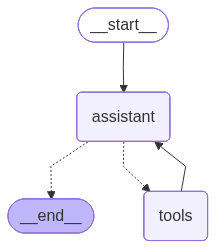

In [ ]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
react_graph_memory = builder.compile(checkpointer=memory)

In [ ]:
# Specify a thread
config = {"configurable": {"thread_id": "78"}}

# Specify an input
messages = [HumanMessage(content="can you transcribe the audio")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you transcribe the audio
================================== Ai Message ==================================

Could you please specify the path to the audio file you'd like to have transcribed, or would you like to record audio first and then have it transcribed?


In [ ]:
messages = [HumanMessage(content=" yes I would like to record audio ")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

Button(description='Start Recording', style=ButtonStyle())

Button(description='Stop Recording', style=ButtonStyle())

================================ Human Message =================================

can you transcribe the audio
================================== Ai Message ==================================

Could you please specify the path to the audio file you'd like to have transcribed, or would you like to record audio first and then have it transcribed?
================================ Human Message =================================

 yes I would like to record audio 
================================== Ai Message ==================================
Tool Calls:
  record_audio (call_x7DtQkdXwjjMgHnw8FLCiwxN)
 Call ID: call_x7DtQkdXwjjMgHnw8FLCiwxN
  Args:
================================= Tool Message =================================
Name: record_audio

Audio record tool successfully called
================================== Ai Message ==================================

The audio recording tool is now ready for you to use. Once you're done recording, let me know if you'd like to transcribe the a

Audio saved as 'recorded_audio.wav'


In [ ]:
messages = [HumanMessage(content="yes transcribe the audio pls ")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

transcribing right now..


/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


================================ Human Message =================================

can you transcribe the audio
================================== Ai Message ==================================

Could you please specify the path to the audio file you'd like to have transcribed, or would you like to record audio first and then have it transcribed?
================================ Human Message =================================

 yes I would like to record audio 
================================== Ai Message ==================================
Tool Calls:
  record_audio (call_x7DtQkdXwjjMgHnw8FLCiwxN)
 Call ID: call_x7DtQkdXwjjMgHnw8FLCiwxN
  Args:
================================= Tool Message =================================
Name: record_audio

Audio record tool successfully called
================================== Ai Message ==================================

The audio recording tool is now ready for you to use. Once you're done recording, let me know if you'd like to transcribe the a

#test websearch tool

In [ ]:
%%capture --no-stderr
%pip install -U  langgraph langgraph_tavily wikipedia langchain_openai langchain_community langgraph_sdk

In [ ]:
pip install -U langchain-tavily

In [ ]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
_set_env("TAVILY_API_KEY")

TAVILY_API_KEY: ··········


In [ ]:
import langchain_tavily

/usr/local/lib/python3.12/dist-packages/langchain_tavily/tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
/usr/local/lib/python3.12/dist-packages/langchain_tavily/tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

#from langchain_community.document_loaders import WikipediaLoader
from langchain_tavily import TavilySearch

def search_web(state):
    """Retrieve docs from web search"""

    tavily_search = TavilySearch(max_results=3)
    data = tavily_search.invoke({"query": state["question"]})
    search_docs = data.get("results", data)

    formatted_search_docs = "\n\n---\n\n".join(
        f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
        for doc in search_docs
    )

    return formatted_search_docs

In [ ]:
def search_web(question: str) -> str:
    """Retrieve docs from web search using a question string."""

    tavily_search = TavilySearch(max_results=3)
    data = tavily_search.invoke({"query": question})
    search_docs = data.get("results", data)

    formatted_search_docs = "\n\n---\n\n".join(
        f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
        for doc in search_docs
    )

    return formatted_search_docs

In [ ]:
search_web("search what it means to have dream about multiple dogs")

'<Document href="https://www.facebook.com/groups/dreaminterpretationandsolution/posts/1527725098237835/">\nIf those dogs were friendly with you then it mean that you have good friends but don\'t trust them too much because they are like dogs and\n</Document>\n\n---\n\n<Document href="https://www.quora.com/What-does-it-mean-when-you-dream-that-you-have-two-dogs-In-reality-you-only-have-one-dog-but-two-in-your-dream">\nA dog in a dream represents unconditional love, devotion, protection, loyalty, and all those things dogs are known for including life in the\n</Document>\n\n---\n\n<Document href="https://www.reddit.com/r/Dreams/comments/1fk2349/so_many_dreams_about_so_many_dogs/">\nYour dreams reflect anxiety about responsibility, fear of losing your dog\'s true self, and confusion about your bond with him. "Explore deeper\n</Document>'

#new agent + search tool

In [2]:
#has some problem
%%capture --no-stderr
%pip install -U  langgraph langgraph_tavily wikipedia langchain_openai langchain_community langgraph_sdk

In [3]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph langgraph-prebuilt

In [4]:
pip install -U langchain-tavily

In [6]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
_set_env("TAVILY_API_KEY")

TAVILY_API_KEY: ··········


In [7]:
from langchain_openai import ChatOpenAI
import whisper
import time
from IPython.display import display
from langchain_tavily import TavilySearch



def transcribe(audio_path: str) -> str:
    """Transcribe an audio file using Whisper Python API.

    if record_audio has been used in session and user asks for transcription the path to the audio file is /content/recorded_audio.wav otherwise use specific path that user provides.

    after returning the transcription ask the user: to reread it and point out mistakes like names being wrong transcribed etc.


    Args:
        audio_path: Path to the audio file.

    Returns:
        The transcription as a string.

    """

    print("transcribing right now..")

    # Load the model
    model = whisper.load_model("medium.en")

    # Transcribe the audio
    result = model.transcribe(audio_path)

    # Return the text only
    return result["text"]

def test() -> str:
    """
    when using now talk like batman and say something funny about robin

    """

    return (
        "test"
    )


def record_audio() -> str:
    """
    Displays the audio recording UI for the user.
    The user must record audio manually.
    The file will be saved as recorded_audio.wav.

    after ask the user when its done recording if it want to transcribe it the it can ask for that.
    """

    #record invoice
    # Connect buttons to functions
    start_button.on_click(start_recording)
    stop_button.on_click(stop_recording)

    # Display buttons
    display(start_button, stop_button)

    # JavaScript to handle audio recording
    output.eval_js('''
        let recorder, stream;

        async function startRecording() {
            stream = await navigator.mediaDevices.getUserMedia({ audio: true });
            recorder = new MediaRecorder(stream);
            chunks = [];
            recorder.ondataavailable = e => chunks.push(e.data);
            recorder.start();
        }

        function stopRecording() {
            return new Promise(resolve => {
                recorder.onstop = () => {
                    const blob = new Blob(chunks, { type: 'audio/wav' });
                    chunks = [];
                    stream.getTracks().forEach(track => track.stop());
                    const reader = new FileReader();
                    reader.onload = () => {
                        const base64data = reader.result.split(',')[1];
                        resolve({audio: base64data, sampleRate: 44100});
                    };
                    reader.readAsDataURL(blob);
                };
                recorder.stop();
            });
        }
    ''')

    return (
        #"Audio recording UI displayed. "
        #"Please click Start Recording, then Stop Recording. "
        #"The file will be saved as recorded_audio.wav."
        "Audio record tool successfully called"
    )

def search_web(question: str) -> str:
    """Retrieve information from web search using a question string."""

    tavily_search = TavilySearch(max_results=3)
    data = tavily_search.invoke({"query": question})
    search_docs = data.get("results", data)

    formatted_search_docs = "\n\n---\n\n".join(
        f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
        for doc in search_docs
    )

    return formatted_search_docs

tools = [test,transcribe, record_audio,search_web]
llm = ChatOpenAI(model="gpt-4o")


llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

ModuleNotFoundError: No module named 'whisper'

In [ ]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked using a tool to transcribe audio or use a tool that the user can use to record audio, when the user uses record audio you can finish the session. You can also search info online")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

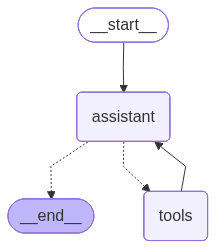

In [ ]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
react_graph_memory = builder.compile(checkpointer=memory)

In [ ]:
# Specify a thread
config = {"configurable": {"thread_id": "1"}}

# Specify an input
messages = [HumanMessage(content="can you search online what it means to dream about falling from the sky")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can you search online what it means to dream about falling from the sky
================================== Ai Message ==================================
Tool Calls:
  search_web (call_pe3Sf4eRAN5qkLhCLTgrChVV)
 Call ID: call_pe3Sf4eRAN5qkLhCLTgrChVV
  Args:
    question: dream about falling from the sky meaning
================================= Tool Message =================================
Name: search_web

<Document href="https://psychcentral.com/lib/dreaming-of-falling-into-water">
Dreaming about falling from the sky. Many people interpret dreams about falling from the sky as a reflection of their feeling out of control.
</Document>

---

<Document href="https://www.youtube.com/watch?v=q6C6vohrTDw">
Dreaming of falling from the sky represents a sudden spiritual loss ... Dream of seeing someone giving you money meaning and interpretation.
</Document>

---

<Document href="https://www.auntyflo.com/dream-

In [ ]:
# Specify a thread
config = {"configurable": {"thread_id": "2"}}

# Specify an input
messages = [HumanMessage(content="can I record some audio?")]

# Run
messages = react_graph_memory.invoke({"messages": messages},config)
for m in messages['messages']:
    m.pretty_print()

Button(description='Start Recording', style=ButtonStyle())

Button(description='Stop Recording', style=ButtonStyle())

================================ Human Message =================================

can I record some audio?
================================== Ai Message ==================================
Tool Calls:
  record_audio (call_fiqcAy6ftLoPD6WKZKO7JPKK)
 Call ID: call_fiqcAy6ftLoPD6WKZKO7JPKK
  Args:
================================= Tool Message =================================
Name: record_audio

Audio record tool successfully called
================================== Ai Message ==================================

You can now record your audio. Let me know when you're done, and if you want, I can transcribe it for you!
Recording started...


Audio saved as 'recorded_audio.wav'


In [ ]:
messages = [HumanMessage(content=" can you transcribe my audio ")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

transcribing right now..


100%|█████████████████████████████████████| 1.42G/1.42G [00:17<00:00, 87.6MiB/s]
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


================================ Human Message =================================

can I record some audio?
================================== Ai Message ==================================
Tool Calls:
  record_audio (call_fiqcAy6ftLoPD6WKZKO7JPKK)
 Call ID: call_fiqcAy6ftLoPD6WKZKO7JPKK
  Args:
================================= Tool Message =================================
Name: record_audio

Audio record tool successfully called
================================== Ai Message ==================================

You can now record your audio. Let me know when you're done, and if you want, I can transcribe it for you!
================================ Human Message =================================

 can you transcribe my audio 
================================== Ai Message ==================================
Tool Calls:
  transcribe (call_QIDnmy9MV4jLOi4nfOYBvEhn)
 Call ID: call_QIDnmy9MV4jLOi4nfOYBvEhn
  Args:
    audio_path: /content/recorded_audio.wav
================================= T

In [ ]:
messages = [HumanMessage(content=" can you search online what meaning my dream can have? ")]
messages = react_graph_memory.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

can I record some audio?
================================== Ai Message ==================================
Tool Calls:
  record_audio (call_fiqcAy6ftLoPD6WKZKO7JPKK)
 Call ID: call_fiqcAy6ftLoPD6WKZKO7JPKK
  Args:
================================= Tool Message =================================
Name: record_audio

Audio record tool successfully called
================================== Ai Message ==================================

You can now record your audio. Let me know when you're done, and if you want, I can transcribe it for you!
================================ Human Message =================================

 can you transcribe my audio 
================================== Ai Message ==================================
Tool Calls:
  transcribe (call_QIDnmy9MV4jLOi4nfOYBvEhn)
 Call ID: call_QIDnmy9MV4jLOi4nfOYBvEhn
  Args:
    audio_path: /content/recorded_audio.wav
================================= T

new test RAG creating vector database

In [16]:
pip install langchain-text-splitters langchain-core langchain-openai langchain-community chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 18.5 MB/s eta 0:00:

In [17]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores.chroma import Chroma
from langchain_core.documents import Document
import whisper
import time
from IPython.display import display
from langchain_tavily import TavilySearch

/usr/local/lib/python3.12/dist-packages/langchain_tavily/tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
/usr/local/lib/python3.12/dist-packages/langchain_tavily/tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


In [18]:
def create_vector_db(file_path: str) -> str:
    """
    Create a vector database from a text file where entries are separated by /end markers.

    Args:
        file_path: Path to the .txt file containing text separated by /end markers.

    Returns:
        A confirmation message that the vector database has been created.
    """

    try:
        # Read the text file
        with open(file_path, 'r', encoding='utf-8') as f:
            text_content = f.read()

        # Create a Document object from the text
        doc = Document(page_content=text_content, metadata={"source": file_path})

        # Split into document chunks using /end as separator
        text_splitter = CharacterTextSplitter(
            separator="/end",
            chunk_overlap=200,
            keep_separator=True,
            chunk_size=2000
        )
        doc_chunks = text_splitter.split_documents([doc])

        # Create embeddings and vector database
        embeddings_model = OpenAIEmbeddings()
        vectordb = Chroma.from_documents(doc_chunks, embeddings_model)

        # Store the retriever globally or return it (you may want to store this in a session variable)
        global retriever
        retriever = vectordb.as_retriever()

        return (
            f"Vector database successfully created from {file_path}. "
            f"Processed {len(doc_chunks)} chunks. "
            f"You can now ask questions about the content."
        )

    except FileNotFoundError:
        return f"Error: File not found at {file_path}. Please check the path and try again."
    except Exception as e:
        return f"Error creating vector database: {str(e)}"

In [19]:
create_vector_db("/content/testdreamjournal.txt")

'Vector database successfully created from /content/testdreamjournal.txt. Processed 2 chunks. You can now ask questions about the content.'

In [ ]:
#above works,below maybe better

In [ ]:
# Create retriever object based on uploaded PDFs
retriever, doc_chunks = configure_retriever(uploaded_files)  # Get both retriever and doc_chunks

In [23]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores.chroma import Chroma
from langchain_core.documents import Document
import whisper
import time
from IPython.display import display
from langchain_tavily import TavilySearch

In [24]:
def create_vector_db(file_path: str) -> str:
    """
    Create a vector database from a text file. The file is expected to be a .txt file with sections separated by '/end' markers.
    The vector database will be persisted to './chroma_db' for later access.

    Args:
        file_path: Path to the .txt file.

    Returns:
        A status message indicating success.
    """
    # Load the text file
    loader = TextLoader(file_path)
    docs = loader.load()

    # Split into chunks using /end as separator
    text_splitter = CharacterTextSplitter(
        separator="/end",
        chunk_overlap=200,
        keep_separator=True,
        chunk_size=2000
    )
    doc_chunks = text_splitter.split_documents(docs)

    # Create embeddings and vector DB
    embeddings_model = OpenAIEmbeddings()
    vectordb = Chroma.from_documents(doc_chunks, embeddings_model, persist_directory="./chroma_db")

    return "Vector database created successfully from the text file."

In [26]:
!pip install langchain-community==0.0.29

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.1.2
    Uninstalling tenacity-9.1.2:
      Successfully uninstalled tenacity-9.1.2
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: langsmith
    Found existing in

In [30]:
pip install --upgrade langchain langchain-core langchain-text-splitters langchain-chroma langchain-openai langchain-community

  Using cached langchain_core-1.2.6-py3-none-any.whl.metadata (3.7 kB)
  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 8.2 MB/s eta 0:00:00
Using cached langchain_core-1.2.6-py3-none-any.whl (489 kB)
Using cached langchain_community-0.4.1-py3-none-any.whl (2.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.9/282.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.147
    Uninstalling langsmith-0.1.147:
      Successfully uninstalled langsmith-0.1.147
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.1.53
    Uninstalling langchain-core-0.1.53:
      Successfully unins

In [32]:
create_vector_db("/content/testdreamjournal.txt")

'Vector database created successfully from the text file.'

In [43]:
# Separate simple code to access the vector DB and answer questions
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.prompts import ChatPromptTemplate  # Updated import
from langchain_chroma import Chroma  # Updated import
from operator import itemgetter

# Load the existing vector DB
embeddings_model = OpenAIEmbeddings()
vectordb = Chroma(persist_directory="./chroma_db", embedding_function=embeddings_model)
retriever = vectordb.as_retriever()

# LLM setup
chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0.1)

# QA template
qa_template = """
Use only the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Keep the answer as concise as possible.

{context}

Question: {question}
"""

qa_prompt = ChatPromptTemplate.from_template(qa_template)

def format_docs(docs):
    return "\n\n".join([d.page_content for d in docs])

# Simple RAG chain
qa_rag_chain = (
    {
        "context": itemgetter("question") | retriever | format_docs,
        "question": itemgetter("question")
    }
    | qa_prompt
    | chatgpt
)

# Example usage: Ask a question
question = "in the context can you find a dream about animals?"
response = qa_rag_chain.invoke({"question": question})
print(response.content)

Talking Animals City: I found myself in a city where animals spoke my language. A fox ran a café, a raccoon drove a bus, and a wise old owl sold maps showing hidden secrets I had never known existed. /end


In [41]:
# Example usage: Ask a question
question = "in the context can you return the full dream about the animals"
response = qa_rag_chain.invoke({"question": question})
print(response.content)

I don't know.


## test txt writing code

In [46]:
from datetime import datetime
import os
import re

def add_dream_to_file(
    dream_text: str,
    file_path: str,
    date: str | None = None,
    title: str | None = None
) -> str:
    """
    Append a dream entry to an existing dream log txt file.

    Args:
        dream_text: The dream content as a string.
        file_path: Path to the txt file where dreams are stored.
        date: Optional date string (e.g. 04/11/2017). If not provided, today's date is used.
        title: Optional dream title. If not provided, one will be auto-generated.

    Returns:
        Confirmation message describing what was added.
    """

    # Ensure file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Dream file not found: {file_path}")

    # Read existing content
    with open(file_path, "r", encoding="utf-8") as f:
        content = f.read()

    # Determine next dream number
    dream_numbers = re.findall(r"Dream (\d+):", content)
    next_dream_number = int(dream_numbers[-1]) + 1 if dream_numbers else 1

    # Handle date
    if not date:
        date = datetime.now().strftime("%m/%d/%Y")

    # Handle title
    if not title or not title.strip():
        # Simple auto-title from first sentence / first few words
        words = dream_text.strip().split()
        title = " ".join(words[:4]).capitalize()
        title = title.rstrip(".,!?")

    # Normalize dream text
    dream_text = dream_text.strip()

    # Build new dream entry
    new_entry = (
        f"\n\nDream {next_dream_number}: {title}\n"
        f"Date: {date}\n\n"
        f"{dream_text}\n\n"
        f"/end"
    )

    # Append to file
    with open(file_path, "a", encoding="utf-8") as f:
        f.write(new_entry)

    return (
        f"Dream {next_dream_number} added successfully "
        f"with title '{title}' and date {date}."
    )

In [47]:
add_dream_to_file("dream about running down a hill at night", "/content/testdreamjournal2.txt")

"Dream 12 added successfully with title 'Dream about running down' and date 01/09/2026."

In [51]:
from datetime import datetime
import os
import re

def add_dream_to_file(
    dream_text: str,
    file_path: str,
    title: str | None = None,
    date: str | None = None

) -> str:
    """
    Append a dream entry to an existing dream log txt file.

    IMPORTANT:
    - If title is None, the LLM MUST generate a suitable dream title
      before calling this tool.

    Args:
        dream_text: The dream content as a string.
        file_path: Path to the txt file where dreams are stored.
        date: Optional date string (MM/DD/YYYY). Defaults to today.
        title: Dream title generated by the LLM.

    Returns:
        Confirmation message.
    """

    if not title or not title.strip():
        raise ValueError("Title must be provided by the LLM before calling this tool.")

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Dream file not found: {file_path}")

    with open(file_path, "r", encoding="utf-8") as f:
        content = f.read()

    dream_numbers = re.findall(r"Dream (\d+):", content)
    next_dream_number = int(dream_numbers[-1]) + 1 if dream_numbers else 1

    if not date:
        date = datetime.now().strftime("%m/%d/%Y")

    dream_text = dream_text.strip()

    new_entry = (
        f"\n\nDream {next_dream_number}: {title}\n"
        f"Date: {date}\n\n"
        f"{dream_text}\n\n"
        f"/end"
    )

    with open(file_path, "a", encoding="utf-8") as f:
        f.write(new_entry)

    return f"Dream {next_dream_number} added: '{title}' ({date})"

In [52]:
add_dream_to_file("dream about flying over a castle", "/content/testdreamjournal2.txt", "flying above the castle")

"Dream 13 added: 'flying above the castle' (01/09/2026)"

In [ ]:
#add this to system prompt

#When the user provides a dream without a title:

#1. Invent a short, evocative dream title (2–6 words).
#2. The title should reflect mood, theme, or central imagery.
#3. Do NOT explain the title.
#4. Pass the generated title to the add_dream_to_file tool.